# European Option

In [1]:
import QuantLib as ql 
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [2]:
# set global evaluation date
today = ql.Date(25, ql.March, 2022)
ql.Settings.instance().evaluationDate = today

In [3]:
print(ql.Settings.instance().evaluationDate)

March 25th, 2022


In [4]:
# Call European Option
# strike price = 100
# expires in 6-month

exp_date = today + ql.Period(6, ql.Months)

option = ql.EuropeanOption(ql.PlainVanillaPayoff(ql.Option.Call, 100),
                           ql.EuropeanExercise(exp_date))

In [5]:
print(exp_date)

September 25th, 2022


## analytic Black-Scholes formula

In [6]:
# underlying value = 100
u = ql.SimpleQuote(100)

# flat risk-free rate = 1%
r = ql.SimpleQuote(0.01)

# flat volatility = 20%
sigma = ql.SimpleQuote(0.2)

ql.TARGET() <br>
TARGET calendar

Holidays (see http://www.ecb.int):

* Saturdays
* Sundays
* New Year's Day, January 1st
* Good Friday (since 2000)
* Easter Monday (since 2000)
* Labour Day, May 1st (since 2000)
* Christmas, December 25th
* Day of Goodwill, December 26th (since 2000)
* December 31st (1998, 1999, and 2001)

In [7]:
# build curve for risk-free rate
risk_free_curve = ql.FlatForward(0, ql.TARGET(), ql.QuoteHandle(r), ql.Actual360())

# build curve for volatility
volatility = ql.BlackConstantVol(0, ql.TARGET(), ql.QuoteHandle(sigma), ql.Actual360())

**The inputs are all stored into handles, so that we could change the quotes and curves used if we wanted.**

In [8]:
# The inputs are all stored into handles, 
# so that we could change the quotes and curves used if we wanted.

# instantiate the process
process = ql.BlackScholesProcess(ql.QuoteHandle(u),
                                 ql.YieldTermStructureHandle(risk_free_curve),
                                 ql.BlackVolTermStructureHandle(volatility))

In [9]:
# build engine
engine = ql.AnalyticEuropeanEngine(process)

In [10]:
# set the engine to option
option.setPricingEngine(engine)

In [11]:
# get option price
print(f"option price: {option.NPV():.4f}")

option price: 5.9434


In [12]:
# the greeks
print(f"Delta: {option.delta():.4f}")
print(f"Gamma: {option.gamma():.4f}")
print(f"Vega: {option.vega():.4f}")

Delta: 0.5427
Gamma: 0.0277
Vega: 28.3577


### Market changes

**market data are stored in Quote instances**<br>
**we can easily change values and ask for NPV again**

In [13]:
# change underlying from to 105
u.setValue(105)

# and ask for NPV
print(f"option price: {option.NPV():.4f}")

option price: 8.9906


In [14]:
# can changes multiple values
u.setValue(90)
r.setValue(0.02)
sigma.setValue(0.3)

print(f"option price: {option.NPV():.4f}")

option price: 4.3555


In [15]:
r.setValue(0.01)
sigma.setValue(0.2)

option_values = []
prices = np.linspace(80, 120, 1000)

for p in prices:
    u.setValue(p)
    option_values.append(option.NPV())

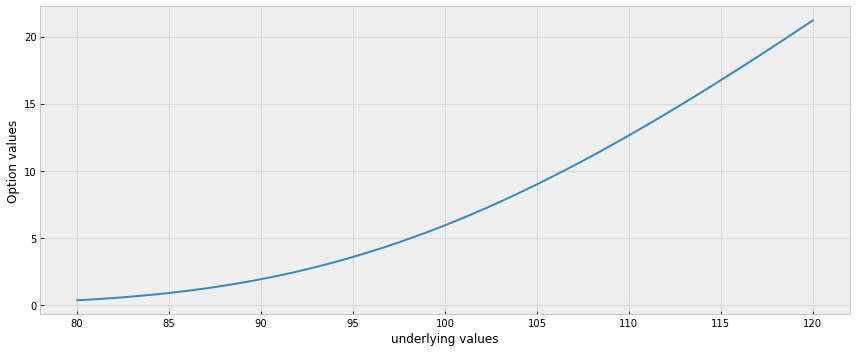

In [16]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(prices, option_values)
ax.set_xlabel('underlying values')
ax.set_ylabel('Option values')

plt.tight_layout()
plt.show()

In [17]:
u.setValue(100)
sigma.setValue(0.2)

option_values = []
rates = np.linspace(0, 0.1, 1000)

for rate in rates:
    r.setValue(rate)
    option_values.append(option.NPV())

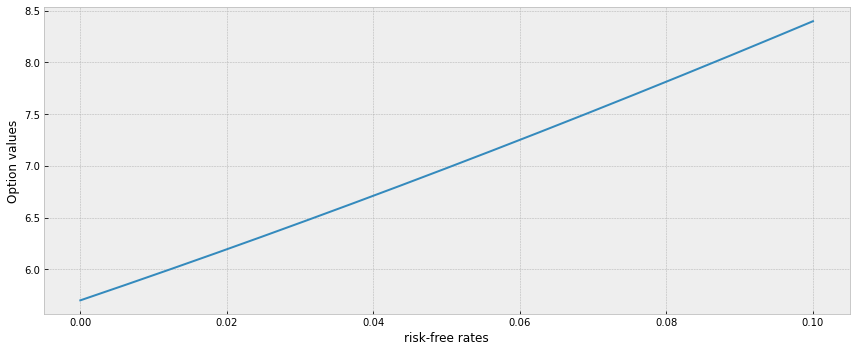

In [18]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(rates, option_values)
ax.set_xlabel('risk-free rates')
ax.set_ylabel('Option values')

plt.tight_layout()
plt.show()

In [19]:
u.setValue(100)
r.setValue(0.01)

option_values = []
vols = np.linspace(0.1, 0.5, 1000)

for vol in vols:
    sigma.setValue(vol)
    option_values.append(option.NPV())

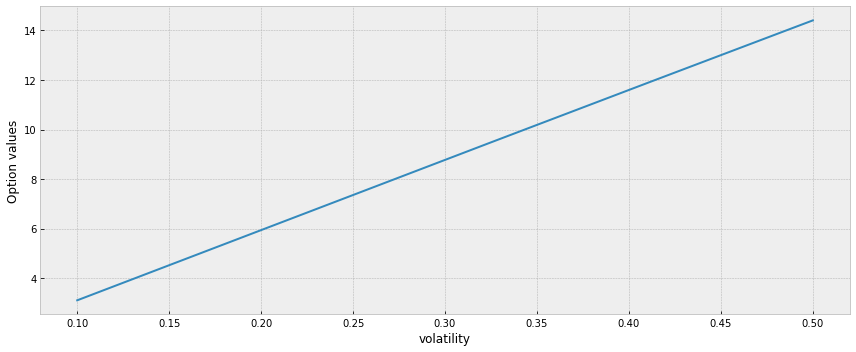

In [20]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(vols, option_values)
ax.set_xlabel('volatility')
ax.set_ylabel('Option values')

plt.tight_layout()
plt.show()

### Date changes

In [21]:
print(f"Evaluation Date: {ql.Settings.instance().evaluationDate}")
print(f"Expiration Date{exp_date}")
print(f"Days till expiration: {exp_date - ql.Settings.instance().evaluationDate}")

Evaluation Date: March 25th, 2022
Expiration DateSeptember 25th, 2022
Days till expiration: 184


In [22]:
u.setValue(100)
r.setValue(0.01)
sigma.setValue(0.2)
ql.Settings.instance().evaluationDate = today
day_to_exp = exp_date - ql.Settings.instance().evaluationDate

days_till_expire = []
option_vals = []

for i in range(day_to_exp-1):
    ql.Settings.instance().evaluationDate = today + ql.Period(i, ql.Days)
    n_days = exp_date - ql.Settings.instance().evaluationDate
    days_till_expire.append(n_days)
    option_vals.append(option.NPV())

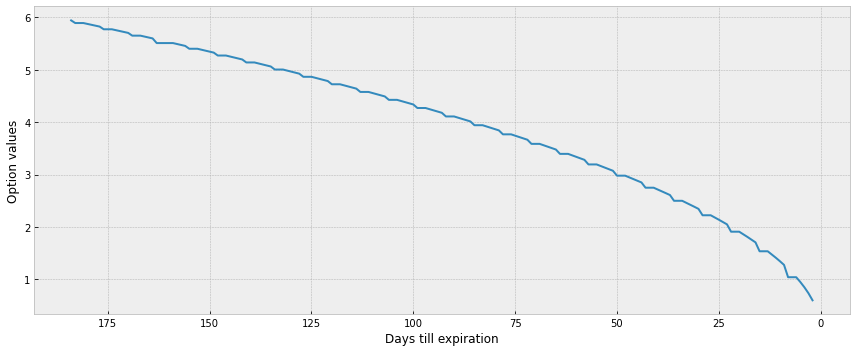

In [23]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(days_till_expire, option_vals)
ax.set_xlabel('Days till expiration')
ax.set_ylabel('Option values')
ax.invert_xaxis()

plt.tight_layout()
plt.show()